# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [54]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier




In [25]:
# Load the dataset
data = pd.read_csv('/Users/anna/iron_hack/lab-imbalance/data_imbalance.csv')

# Sample 100,000 entries
sample_data = data.sample(n=100000, random_state=1)

# Display basic statistics
# print(sample_data.describe())

The following features are likely to be significant in determining the outcome of fraud detection:
1. Transaction Amount
Larger transaction amounts may correlate with higher fraud risk.
2. Old and New Balances
The differences between oldbalanceOrg and newbalanceOrig can indicate unusual activity, especially if a large amount is withdrawn or transferred.
3. Account Activity
The frequency of transactions and the patterns of account usage (e.g., sudden spikes in transaction amounts or frequency) can be strong indicators of potential fraud.
4. Account Age
If available, the age of the accounts (how long they have been active) may provide insights, as newer accounts may be more susceptible to fraud.
5. Destination Account Characteristics
Analyzing the destination account's balance and transaction history could reveal potential red flags.
6. Transaction Type
Different transaction types (CASH_IN, CASH_OUT, PAYMENT) may have varying risks associated with them.

In [3]:
sample_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6322570,688,CASH_IN,23557.12,C867750533,8059.00,31616.12,C1026934669,169508.66,145951.53,0,0
3621196,274,PAYMENT,6236.13,C601099070,0.00,0.00,M701283411,0.00,0.00,0,0
1226256,133,PAYMENT,33981.87,C279540931,18745.72,0.00,M577905776,0.00,0.00,0,0
2803274,225,CASH_OUT,263006.42,C11675531,20072.00,0.00,C529577791,390253.56,653259.98,0,0
3201247,249,CASH_OUT,152013.74,C530649214,20765.00,0.00,C1304175579,252719.19,404732.93,0,0


### What is the distribution of the outcome? 

0    99876
1      124
Name: isFraud, dtype: int64


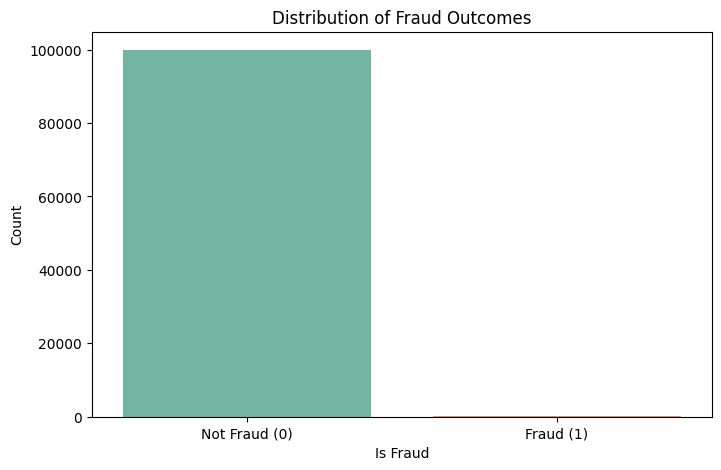

In [26]:
# Your response here
# Count the occurrences of each outcome
outcome_counts = sample_data['isFraud'].value_counts()

# Print the outcome counts
print(outcome_counts)

# Plotting the distribution of the outcome
plt.figure(figsize=(8, 5))
sns.countplot(x='isFraud', data=sample_data, palette='Set2')
plt.title('Distribution of Fraud Outcomes')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [31]:
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

total_data_count = len(data)
fraud_data_count = len(fraud_data)

sampled_non_fraud_data = non_fraud_data.sample(n=fraud_data_count, random_state=1)

In [40]:
balanced_data = pd.concat([sampled_non_fraud_data, fraud_data], ignore_index=True)

In [41]:
balanced_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,159,CASH_IN,290448.64,C683933272,49671.00,340119.64,C948751934,34047.63,0.00,0,0
1,19,PAYMENT,7521.26,C1434220511,0.00,0.00,M2098189366,0.00,0.00,0,0
2,210,PAYMENT,12043.69,C1632575026,0.00,0.00,M83346807,0.00,0.00,0,0
3,357,CASH_IN,120116.21,C835727091,97688.68,217804.90,C2084926563,849069.38,728953.17,0,0
4,211,CASH_OUT,115161.12,C1656739705,0.00,0.00,C778089718,576802.51,691963.63,0,0


In [42]:
print(len(balanced_data))

16426


0    8213
1    8213
Name: isFraud, dtype: int64


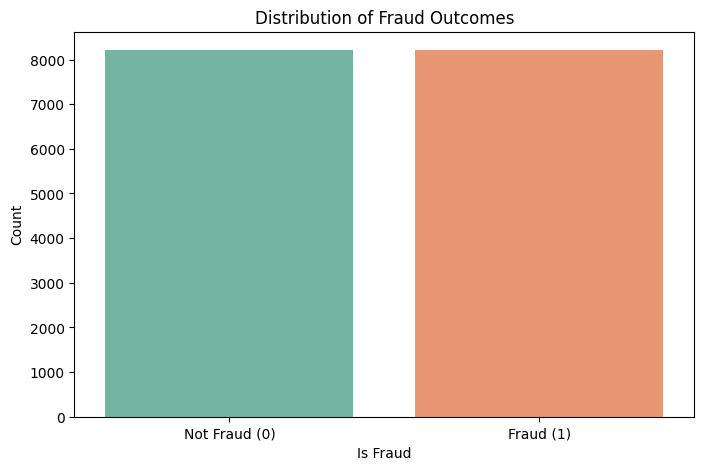

In [43]:
# Your response here
# Count the occurrences of each outcome in balanced data
outcome_counts = balanced_data['isFraud'].value_counts()

# Print the outcome counts in balanced data
print(outcome_counts)

# Plotting the distribution of the outcome in balanced data
plt.figure(figsize=(8, 5))
sns.countplot(x='isFraud', data=balanced_data, palette='Set2')
plt.title('Distribution of Fraud Outcomes')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

In [44]:
# Your code here
# Drop unnecessary columns 
balanced_data.drop(columns=['step', 'nameOrig', 'nameDest'], inplace=True) 

# Check for missing values
print(balanced_data.isnull().sum())

# Handle missing values 
balanced_data.dropna(inplace=True)

# Check for duplicates
balanced_data.drop_duplicates(inplace=True)

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
# Create a feature for balance change
balanced_data['balance_change'] = balanced_data['newbalanceOrig'] - balanced_data['oldbalanceOrg']

In [46]:
# One-hot encode the 'type' column
balanced_data = pd.get_dummies(balanced_data, columns=['type'], drop_first=True)

In [47]:
# Define features and target variable
X = balanced_data.drop(columns=['isFraud', 'isFlaggedFraud'])  # Features
y = balanced_data['isFraud']  # Target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_final = pd.DataFrame(X_scaled, columns=X.columns)
y_final = y.reset_index(drop=True)


### Run a logisitc regression classifier and evaluate its accuracy.

In [49]:
# Your code here

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [50]:
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [51]:
accuracy

0.9156736938588451

In [52]:
conf_matrix

array([[1532,  103],
       [ 173, 1465]])

In [53]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.90      0.94      0.92      1635\n           1       0.93      0.89      0.91      1638\n\n    accuracy                           0.92      3273\n   macro avg       0.92      0.92      0.92      3273\nweighted avg       0.92      0.92      0.92      3273\n'

### Now pick a model of your choice and evaluate its accuracy.

In [56]:
# Your code here
# Preprocess the dataset
X = balanced_data.drop(columns=['isFraud', 'isFlaggedFraud'])
y = balanced_data['isFraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Prediction Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Prediction Accuracy: 0.9942
Confusion Matrix:
[[1620   15]
 [   4 1634]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1635
           1       0.99      1.00      0.99      1638

    accuracy                           0.99      3273
   macro avg       0.99      0.99      0.99      3273
weighted avg       0.99      0.99      0.99      3273



### Which model worked better and how do you know?

# Your response here
Based on Prediction Accuracy Random Forest worked better than logistic regression model

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.